**Bora Basa 2020-02-02**

Notes on notation: 
- I won't use bold face for vectors or matrices: $x:=\mathbf{x}$. 
- $x^+=g(x)$ should be read as $x_{n+a}=g(x_n)$.

# Gradient descent

We are given the cost function

$$
f(x_1, x_2) = 9 x_1^2+x_2^2.
$$
**(1)** The gradient is 

$$
\nabla f(x_1,x_2) = (18 x_1, 2x_2)^T
$$
**(2)** The fixed step size, $\delta>0$ gradient descent for $x^{(0)} = (1,2)$ is as follows.

$$
x^+ = x-\delta \nabla f = (x_1, x_2)^T-\delta (18 x_1, 2x_2)^T = (x_1 (1-18\delta), x_2(1-2\delta))^T
$$

The Hessian of $f(x)$ is simply the matrix $\text{diag}(18,1)$ which has spectral norm 18. Then, $\nabla f(x)$ is Lipschitz continuous with constant 18. Thus, the GD algorithm is guaranteed to converge for $0<\delta\leq \frac{2}{18}$.

f minimized at [2.03703598e-10 4.07407195e-10]


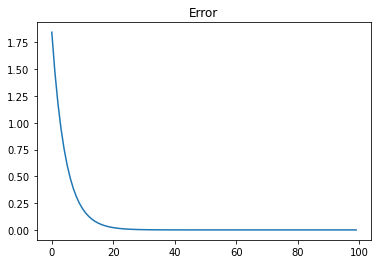

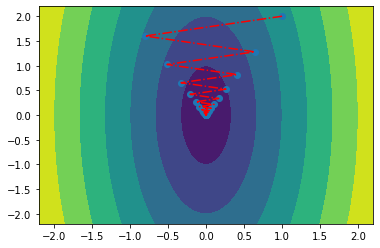

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simpleGD(delta, df, N=500, prec = 0.01, iter_max=1000, x0=(1.,2.)):    
    x = [np.array(x0)]
    j = 0
    err = [0]
    while j<iter_max:
        x_new = x[j]- delta*df(x[j]) 
        err.append(np.linalg.norm(x_new-x[j]))
        x.append(x_new)
        j += 1
    return x, err[1:]

df = lambda x_: np.dot(np.diag([9, 1]), x_) 
x_opt, err = simpleGD(0.2, df, iter_max=100)
plt.figure()
plt.title("Error")
plt.plot(err)
print("f minimized at "+str((x_opt[-1])))
xlist = np.linspace(-2.2, 2.2, 100)
ylist = np.linspace(-2.2, 2.2, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(9*X**2 + Y**2)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
x=np.array(x_opt)
plt.scatter(x[:,0], x[:,1])
plt.plot(x[:,0], x[:,1], "r-.")
plt.show()

**(3)** Now let $X_t^{(\delta)}:=x_{\lfloor t /\delta \rfloor}$. The GD update equation becomes
$$
x_{\lfloor t /\delta \rfloor +1} = x_{\lfloor t /\delta \rfloor}-\delta \nabla f(x_{\lfloor t /\delta \rfloor}) \to X_t^{(\delta+1)} = X_t^{(\delta)} -\delta \nabla f(X_t^{(\delta)})
$$
Rearranging,
$$
\frac{X_t^{(\delta+1)}-X_t^{(\delta)}}{\delta} = -\nabla f(X_t^{(\delta)}).
$$
Under $\delta \to 0$ this becomes the ODE
$$
\frac{dX(t)}{dt} = -\nabla f(X(t)) 
$$
with $X(t):=\lim_{\delta\to 0}X^\delta_t$. Given quadratic form $f(x)=x^T A x$, we find that $\nabla f(x)=2Ax$ (in this case $A = \text{diag}(9, 1)$). Then, we have the matrix ODE
$$
\frac{dX(t)}{dt} = - A X(t)
$$
subject to $X(0)=(1, 2)$. The solution is $X(t)=(1, 2)^T\times \exp A$ which is 
$$
X_1(t) = e^{-9 t}
$$
$$
X_2(t) = 2e^{-t}
$$
This gives us some understanding of the asymptotic behavior of the algorithm. In particular, we converge to $X(t\to \infty)=(0,0)$ exponentially fast. This matches qualitatively the error curve plotted above.

# Stability

We have the function $f(x)= \lambda x^2$ for $x\in\mathbb{R}$ and $\lambda>0$.

**(1)** The simple gradient descent iterates follow the recursion
$$
x^+ = x(1-2\lambda \delta)
$$

**(2)** Correspondingly we have
$$
f(x^+) = \lambda (x^+)^2 = \lambda x^2 (1-2\lambda \delta)^2 
$$
we want $f(x^+)$ to be smaller than $f(x)$ so that we approach the minimum with each iteration of the algorithm. That is, we want
$$
\frac{f(x^+)}{f(x)}= \frac{\lambda x^2 (1-2\lambda \delta)^2 }{\lambda x^2} = (1-2\lambda \delta)^2<1
$$
Hence, the two branches of the square root give us the constraint
$$
0<\delta\lambda<1\implies 0<\delta<\frac{1}{\lambda}
$$


# Fish toxicity

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from IPython.display import Markdown as md


In [3]:
data = pd.read_csv("qsar_fish_toxicity.csv", delimiter=";", names=["CIC0", "SM1_Dz(Z)", "GATS1i", "NdsCH", "NdssC", "MLOGP", "LC50"])
data = data.apply(lambda x: x-x.mean())
data.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
0,0.361871,0.200532,0.382409,-0.229075,0.514317,-0.656285,-0.294431
1,-0.709129,-0.048468,-0.430591,-0.229075,-0.485683,-0.761285,-0.949431
2,-0.773129,0.009532,-0.462591,-0.229075,-0.485683,-0.761285,-0.533431
3,0.128871,-0.297468,0.178409,0.770925,-0.485683,-0.302285,-0.554431
4,-0.804129,0.198532,-0.433591,-0.229075,-0.485683,-0.223285,1.325569


In [6]:
X = data.drop(["LC50"], axis=1)
Y = data.LC50
reg = LinearRegression().fit(X, Y)

md("$R^2=$"+str(round(reg.score(X, Y),3)))

$R^2=$0.577

In [7]:
print("Coefficients")
cf = reg.coef_
#cf = np.append(cf, reg.intercept_)
print(cf)

Coefficients
[ 0.38562621  1.25562193 -0.74641356  0.41355009  0.06433409  0.39005251]


In [8]:
md("LC50=%5.2f CIC0+%5.2f SM1_Dz(Z) %5.2f GATS1i+%5.2f NdsCH+%5.2f NdssC+%5.2f MLOGP"%tuple(cf))

LC50= 0.39 CIC0+ 1.26 SM1_Dz(Z) -0.75 GATS1i+ 0.41 NdsCH+ 0.06 NdssC+ 0.39 MLOGP

**(2)** I will implement ordinary least squares regression - this is what happens under the hood for sklearn's LinearRegression. The error metric is simply $|y-\hat y|$ where the hat denotes the true value. As usual, we want a surrogate loss function that has nicer derivatives. The natural choice is 
$$
L(y) = \|y - \hat y\|_2^2.
$$
We want to model the label vector $y$ as a linear combination (with weight vector $w$) of *centered* features, $X$:
$$
y = X w.
$$
More explicitly, in components, this is 
$$
y_i = \sum_j X_{ij}w_j.
$$
The loss function is then
$$
L(w; X) = \|Xw - \hat y\|_2^2.
$$
We go ahead and optimize  
$$
\nabla_w L(w;X) =\nabla_w\left\{(Xw-\hat y)^T(Xw-\hat y)\right\}= X^T(Xw-\hat y)+(Xw-\hat y)^T X = 2X^T (Xw-\hat y)
$$

$$
2 X^T(Xw_\star -\hat y) = 0\implies w_\star = (X^T X)^{-1} X^T\hat y
$$
which assumes $X$ is of full column rank so that $\exists (X^T X)^{-1}$. The loss function is clearly convex so we have found the weight vector that achieves minimum loss. The implementation is trivial:

In [9]:
regress = lambda X, y: np.linalg.multi_dot([np.linalg.inv(np.dot(X.T, X)), X.T, y])

In [10]:
cf_2 = regress(X.values, Y.values)
md("LC50=%5.2f CIC0+%5.2f SM1_Dz(Z) %5.2f GATS1i+%5.2f NdsCH+%5.2f NdssC+%5.2f MLOGP"%tuple(cf_2))

LC50= 0.39 CIC0+ 1.26 SM1_Dz(Z) -0.75 GATS1i+ 0.41 NdsCH+ 0.06 NdssC+ 0.39 MLOGP

As expected, we get the same set of coefficients.

**(3)** Alternative to the algebraic manipulations above, we can perform simple gradient descent to determine the optimal coefficients to a desired accuracy. Here is the implementation from Q1:

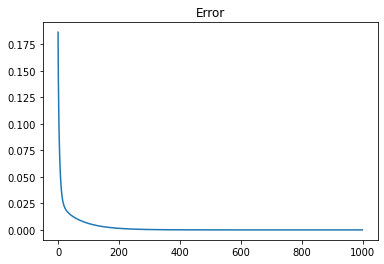

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def simpleGD(delta, df, N=500, prec = 0.01, iter_max=1000, x0=(1.,2.)):    
    x = [np.array(x0)]
    j = 0
    err = [0]
    while j<iter_max:
        x_new = x[j]- delta*df(x[j]) 
        err.append(np.linalg.norm(x_new-x[j]))
        x.append(x_new)
        j += 1
    return x, err[1:]

x = X.values
y = Y.values
df = lambda w: 2*np.dot(x.T,(np.dot(x, w)-y))  
x_opt, err = simpleGD(0.0001, df, iter_max=1000, x0=np.random.rand(len(data.columns)-1))
plt.figure()
plt.title("Error")
plt.plot(err)
cf_GD = x_opt[-1]

In [12]:
md("LC50=%5.2f CIC0+%5.2f SM1_Dz(Z) %5.2f GATS1i+%5.2f NdsCH+%5.2f NdssC+%5.2f MLOGP"%tuple(cf_GD))

LC50= 0.39 CIC0+ 1.26 SM1_Dz(Z) -0.75 GATS1i+ 0.41 NdsCH+ 0.06 NdssC+ 0.39 MLOGP

We recover the same regressor up to two decimals (just from what I printed). Naturally, we expect some deviation from the coefficients of part (1) and (2) but we know the error we made so we can meet any given precision bound. 